## **Random Forest Algorithm**

The Random Forest algorithm is a powerful ensemble machine learning model used for both **classification** and **regression** tasks. It is based on the idea of combining multiple decision trees to improve the accuracy and robustness of the model.

#### **How It Works**:
1. **Random Sampling**: A random subset of data (with replacement, known as **bootstrapping**) is selected to build each individual tree.
2. **Random Feature Selection**: At each split within a tree, a random subset of features is considered rather than all features. This helps in reducing correlation among trees.
3. **Majority Voting or Averaging**: For classification, the final prediction is made by taking the majority vote from all the trees. For regression, the final prediction is the average of the predictions of all trees.

#### **Important Parameters**:

1. **`n_estimators`**:  
   - The number of trees in the forest. A higher number of trees generally improves performance but increases computation time.
   - Default: 100

2. **`max_depth`**:  
   - Maximum depth of the individual trees. Limiting depth helps prevent overfitting.
   - Default: `None` (fully grown trees)

3. **`min_samples_split`**:  
   - The minimum number of samples required to split an internal node. Higher values prevent overfitting by ensuring splits are meaningful.
   - Default: 2

4. **`min_samples_leaf`**:  
   - The minimum number of samples required to be at a leaf node. Setting this to a higher value prevents the model from learning overly specific patterns that might not generalize.
   - Default: 1

5. **`max_features`**:  
   - The number of features to consider when looking for the best split. Smaller values of `max_features` make the trees less correlated, which improves the overall performance of the ensemble.
   - Options: `"auto"`, `"sqrt"`, `"log2"`.

6. **`bootstrap`**:  
   - Whether bootstrap samples are used when building trees. Setting this to `False` uses the entire dataset to build trees.
   - Default: `True`

7. **`criterion`**:  
   - The function to measure the quality of a split. For classification, it can be `"gini"` or `"entropy"`. For regression, it can be `"mse"` or `"mae"`.
   - Default: `"gini"` for classification and `"mse"` for regression.

---

### **Ensemble Technique**

**Ensemble learning** is the process of combining multiple models to solve a problem. Random Forest is an example of **ensemble learning**, where the ensemble of decision trees work together to produce a better result than an individual tree.

The main ensemble techniques are:
1. **Bagging (Bootstrap Aggregating)**:  
   Random Forest uses **bagging** to create an ensemble of trees. In bagging, multiple models are trained on random subsets of the data, and their outputs are combined for the final prediction (through majority voting in classification and averaging in regression).

2. **Boosting**:  
   Boosting is another ensemble technique (not used in Random Forest) where trees are trained sequentially. Each tree tries to correct the mistakes of the previous one.

---

### **Bagging**

Bagging is an ensemble technique used to improve the stability and accuracy of machine learning models. It reduces variance and helps in preventing overfitting. The key steps in bagging are:
1. **Bootstrap Sampling**: Create multiple datasets by randomly sampling with replacement from the original dataset.
2. **Training**: Train a separate model (e.g., decision tree) on each of these datasets.
3. **Aggregation**: For classification, predictions are combined using **majority voting**; for regression, they are combined using **averaging**.

#### **Advantages of Bagging**:
- Reduces variance and overfitting.
- More robust and stable than individual models.
  
---

### **Advantages of Random Forest**:

1. **High Accuracy**:  
   The ensemble of trees reduces overfitting, leading to more accurate predictions compared to a single decision tree.

2. **Handles Large Datasets**:  
   Random Forest can handle large datasets with higher dimensionality.

3. **Reduces Overfitting**:  
   The randomness in feature selection and bootstrapping helps in reducing the correlation between trees, which reduces the risk of overfitting.

4. **Works Well with Missing Data**:  
   Random Forest can handle missing values by randomly filling them based on other data.

5. **Versatile**:  
   Random Forest works well for both classification and regression tasks.

6. **Feature Importance**:  
   Random Forest provides an inherent way of measuring feature importance, which helps in understanding which features are most relevant for predictions.

---

### **Disadvantages of Random Forest**:

1. **Computationally Expensive**:  
   Training a large number of trees requires significant computational power and memory.

2. **Less Interpretability**:  
   Unlike decision trees, which are easy to interpret, Random Forest is more of a black-box model since it aggregates many trees.

3. **Slower Predictions**:  
   For large datasets, the prediction phase can be slow because each tree needs to provide a prediction before the final decision is made.

4. **Bias-Variance Tradeoff**:  
   While Random Forest reduces variance, it may still have a higher bias compared to more complex models like Gradient Boosting Machines (GBMs).

---

### **Feature Importance in Random Forest**:

- Random Forest ranks features by their importance. Feature importance is calculated by averaging the decrease in **Gini Impurity** (or another criterion) across all trees for each feature.
- Features that contribute to large reductions in impurity (i.e., better splits) are deemed more important.
- This feature ranking helps in identifying which features have the most predictive power and can be useful for feature selection in other models.

---

### **Normalization**:

Normalization is the process of scaling input data to a fixed range, which helps certain algorithms like Gradient Descent-based models to converge faster.

- **Random Forest** typically does **not require normalization** because the algorithm splits data based on thresholds, and the scale of the features doesn't affect these splits.
  
However, in certain cases, normalizing the data before feeding it into the model can make training more efficient, especially when Random Forest is part of a pipeline that includes other models sensitive to scaling.

---

### **Conclusion**:

The Random Forest algorithm is a robust and versatile tool that leverages the power of ensemble learning and bagging. It performs well on both classification and regression tasks and provides insights into feature importance. While it has some limitations like computational expense and reduced interpretability, its advantages often outweigh these drawbacks, especially for high-dimensional and complex datasets.



**Import all the required frameworks**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

To perform the EDA on this data

In [4]:
X = data.drop(columns='quality', axis=1)
y = data['quality']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Data Modeling: DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = model.predict(X_test)
print(y_pred)

[6 6 7 4 6 5 7 4 5 5 6 7 6 6 5 5 6 5 6 5 5 5 6 6 5 6 6 7 7 5 6 6 6 5 5 6 5
 5 6 6 5 7 6 5 6 5 5 7 6 6 7 5 6 6 7 6 5 8 5 5 5 4 5 6 6 6 7 5 5 5 6 5 3 6
 7 6 5 5 6 5 5 5 5 5 6 5 7 7 6 5 6 5 5 6 6 5 5 4 5 5 5 5 5 5 4 5 5 5 5 5 6
 6 6 5 5 6 5 5 6 6 5 6 6 7 7 7 6 6 5 7 6 6 5 5 5 5 6 5 6 5 6 6 4 6 5 6 5 6
 6 6 5 6 6 5 6 7 6 5 5 6 6 5 6 7 6 6 5 5 6 6 5 7 7 5 5 6 5 6 5 8 5 4 8 5 5
 6 6 6 7 5 6 7 5 5 5 6 6 5 5 5 7 5 6 7 6 5 5 5 5 5 7 6 6 5 7 6 5 5 5 6 5 6
 6 6 8 6 5 5 6 6 5 5 5 6 5 5 5 7 5 6 6 6 5 5 8 5 5 7 5 6 8 8 6 5 6 5 6 7 5
 6 6 5 6 6 6 5 7 6 5 6 5 5 5 6 5 4 5 6 5 5 5 5 6 6 7 5]


[Text(0.3940912252466484, 0.9782608695652174, 'x[10] <= 9.85\ngini = 0.637\nsamples = 857\nvalue = [4.0, 26.0, 375.0, 339.0, 101.0, 12.0]'),
 Text(0.1898036253776435, 0.9347826086956522, 'x[6] <= 109.5\ngini = 0.453\nsamples = 337\nvalue = [2.0, 10.0, 233.0, 88.0, 4.0, 0.0]'),
 Text(0.29194742531214596, 0.9565217391304348, 'True  '),
 Text(0.18496978851963747, 0.8913043478260869, 'x[9] <= 0.595\ngini = 0.481\nsamples = 305\nvalue = [2, 10, 201, 88, 4, 0]'),
 Text(0.1175226586102719, 0.8478260869565217, 'x[8] <= 3.545\ngini = 0.386\nsamples = 154\nvalue = [1, 6, 117, 29, 1, 0]'),
 Text(0.10785498489425982, 0.8043478260869565, 'x[5] <= 29.5\ngini = 0.37\nsamples = 150\nvalue = [1, 6, 116, 26, 1, 0]'),
 Text(0.10302114803625377, 0.7608695652173914, 'x[3] <= 4.4\ngini = 0.408\nsamples = 132\nvalue = [1, 6, 98, 26, 1, 0]'),
 Text(0.09335347432024169, 0.717391304347826, 'x[6] <= 104.5\ngini = 0.387\nsamples = 129\nvalue = [1, 5, 98, 24, 1, 0]'),
 Text(0.08851963746223565, 0.6739130434782609,

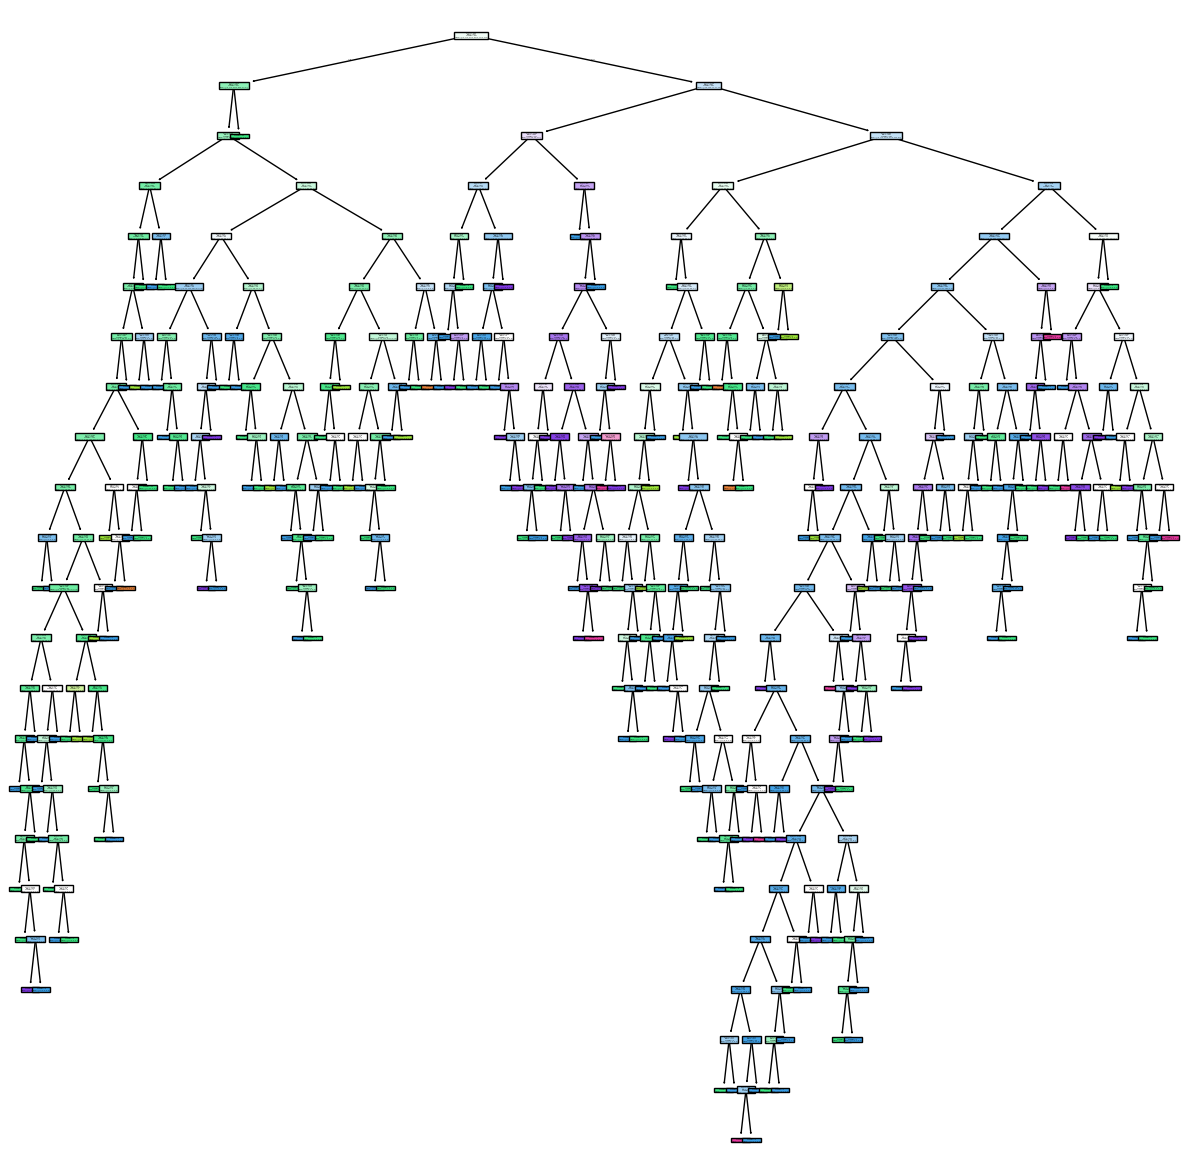

In [8]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model, filled=True)

In [9]:
data.shape

(1143, 12)

In [10]:
sampleData = data.head(20)
sampleData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [11]:
X_sample = sampleData.drop(columns='quality', axis=1)
y_sample = sampleData['quality']
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample, y_sample)

DecisionTreeClassifier()

In [12]:
y_sample.value_counts()

quality
5    14
6     3
7     3
Name: count, dtype: int64

In [13]:
X_sample.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

[Text(0.5909090909090909, 0.9, 'x[2] <= 0.41\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.36363636363636365, 0.7, 'x[6] <= 22.0\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4772727272727273, 0.8, 'True  '),
 Text(0.18181818181818182, 0.5, 'x[8] <= 3.32\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5454545454545454, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6363636363636364, 0.3, 'x[2] <= 0.07\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7272727272727273, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.7, 'x[8] <= 3.23\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 

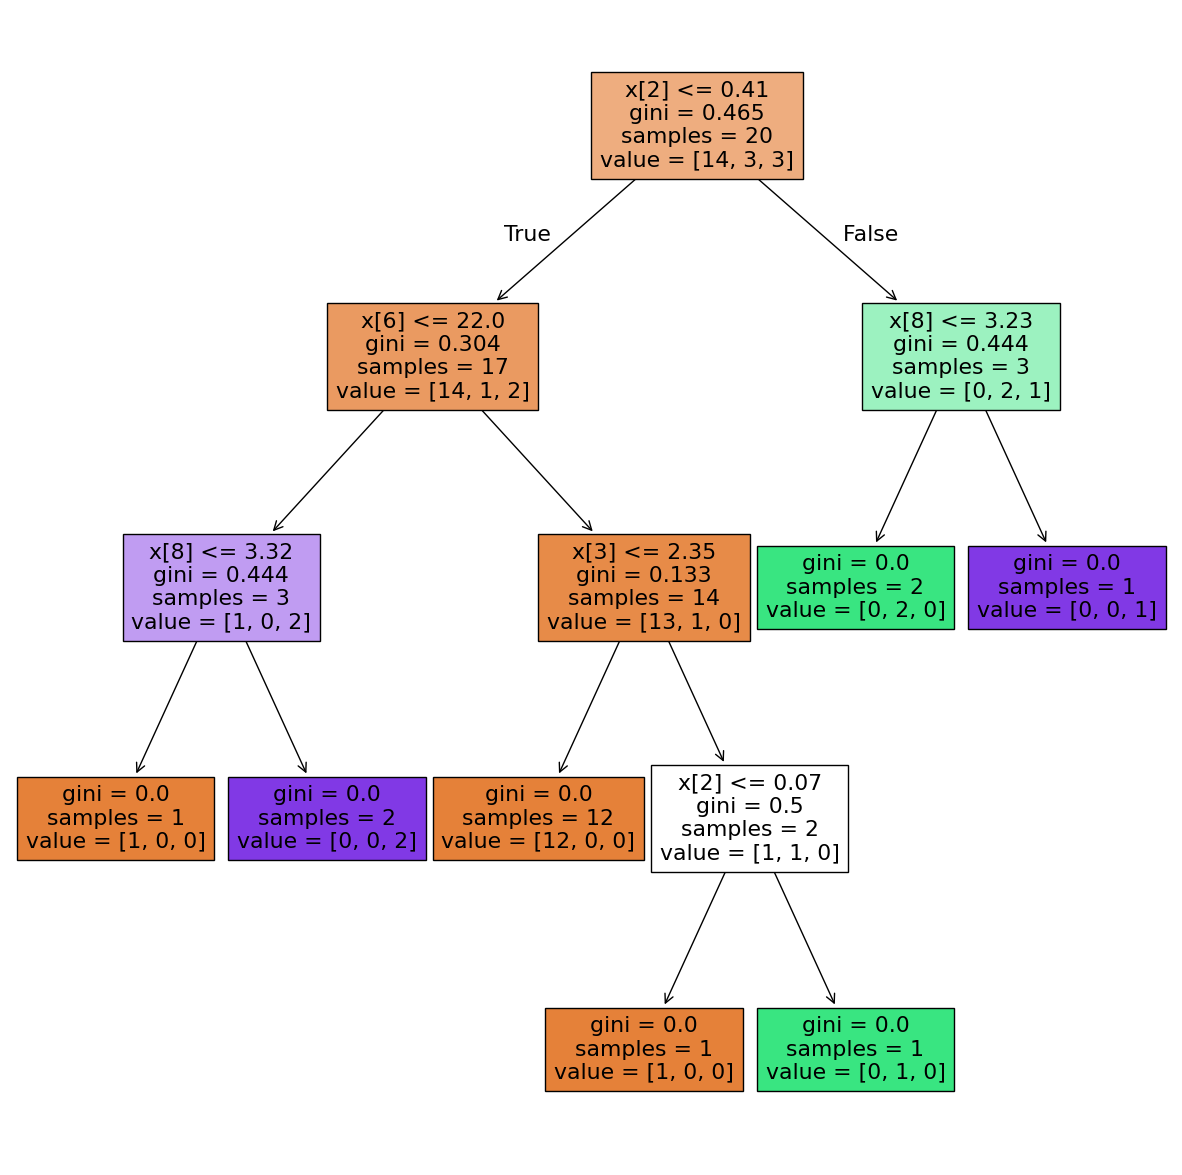

In [14]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(sampleModel, filled=True)

`make_classification()` is a function in the **Scikit-learn** library used to generate synthetic classification datasets. It is useful for testing and prototyping machine learning algorithms by providing customizable, randomly generated data.

### **Functionality**
The `make_classification()` function allows you to create a dataset with specified characteristics such as the number of classes, features, informative features, redundant features, clusters per class, and noise. You can use this data for training and testing classification models, or for experimenting with different algorithms.

### **Syntax**
```python
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_classes=2, random_state=42)
```

### **Parameters**

Some of the key parameters are:

- **`n_samples`**:  
  The total number of samples (data points) in the dataset.  
  *Default: 100*

- **`n_features`**:  
  The total number of features (columns) in the dataset. This includes informative, redundant, and noise features.  
  *Default: 20*

- **`n_informative`**:  
  The number of features that actually carry information useful for classification.  
  *Default: 2*

- **`n_redundant`**:  
  The number of features that are generated as random linear combinations of the informative features.  
  *Default: 2*

- **`n_classes`**:  
  The number of classes (or target labels) in the classification problem.  
  *Default: 2*

- **`n_clusters_per_class`**:  
  The number of clusters per class. Controls the separability of the classes.  
  *Default: 2*

- **`flip_y`**:  
  The fraction of samples whose class labels are randomly flipped to introduce noise.  
  *Default: 0.01*

- **`random_state`**:  
  Sets a seed for reproducibility so that the same dataset is generated every time the function is called with the same parameters.

### **Return Values**

- **`X`**:  
  An array of shape `(n_samples, n_features)` containing the features of the dataset.

- **`y`**:  
  An array of shape `(n_samples,)` containing the labels (target values) of the dataset.

### **Example Usage**

```python
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data")
plt.show()
```

In this example:
- `n_samples=1000`: 1000 data points.
- `n_features=2`: Two features (so it can be easily plotted in 2D).
- `n_informative=2`: Both features are informative for classification.
- `n_redundant=0`: No redundant features.

### **Use Cases**
- **Algorithm Testing**: You can quickly generate datasets to test classification algorithms like Logistic Regression, Decision Trees, Random Forests, etc.
- **Debugging**: It helps to diagnose and debug models on synthetic data before using real-world datasets.
- **Benchmarking**: You can use it to compare the performance of different algorithms on controlled datasets.

### **Advantages**
- Flexibility to create datasets with different levels of complexity.
- Provides a simple and efficient way to generate labeled data for testing.
- Helps understand how different algorithms behave with certain data characteristics.

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 5, n_classes = 2, n_features = 2, n_informative = 2, n_redundant=0, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

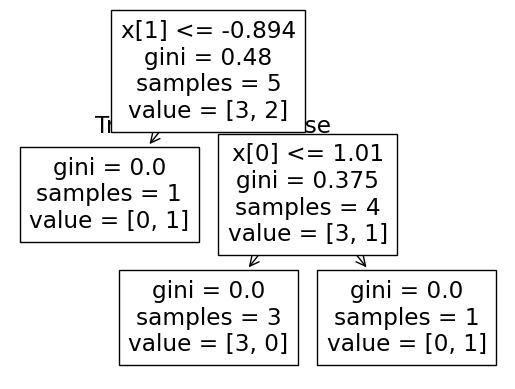

In [16]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [17]:
clf.feature_importances_

array([0.625, 0.375])

In [18]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rf.score(X_test, y_test)

0.7062937062937062

In [20]:
y_predict_rf = rf.predict(X_test)
print(y_predict_rf)

[6 5 6 5 5 7 6 5 5 6 5 6 6 5 6 5 6 5 6 5 6 6 6 6 5 6 6 5 6 6 6 5 6 6 5 6 5
 5 6 5 5 6 5 6 6 5 6 7 6 5 7 6 7 6 6 5 5 5 6 6 6 7 6 5 6 5 6 6 5 7 5 5 7 5
 5 6 6 6 5 5 6 5 6 7 6 6 6 5 5 7 5 5 6 5 6 6 5 6 6 5 5 5 5 5 6 5 5 6 5 6 5
 6 6 6 6 6 5 5 5 5 6 5 7 6 6 5 6 6 5 6 5 6 7 6 7 5 5 5 5 7 5 6 6 6 5 6 5 5
 6 5 5 7 5 6 7 5 6 5 6 6 5 6 6 6 6 6 5 7 6 5 5 5 7 5 6 5 6 5 6 6 5 6 6 5 6
 7 6 5 5 5 5 5 5 5 5 6 5 6 6 5 5 5 6 5 5 6 5 5 5 5 5 6 5 6 6 6 7 6 6 6 5 6
 7 5 5 6 7 6 5 6 5 6 5 5 6 6 5 6 5 6 6 5 5 6 5 5 5 5 5 6 6 5 5 6 6 7 6 5 5
 6 7 6 5 5 5 6 6 7 6 7 5 6 7 6 6 5 5 5 7 6 5 6 5 5 6 7]


In [21]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1207221650),
 DecisionTreeClassifier(max_features='sqrt', random_state=271498305),
 DecisionTreeClassifier(max_features='sqrt', random_state=1520572380),
 DecisionTreeClassifier(max_features='sqrt', random_state=1084035594),
 DecisionTreeClassifier(max_features='sqrt', random_state=1600634660),
 DecisionTreeClassifier(max_features='sqrt', random_state=1771429680),
 DecisionTreeClassifier(max_features='sqrt', random_state=1616302164),
 DecisionTreeClassifier(max_features='sqrt', random_state=210688443),
 DecisionTreeClassifier(max_features='sqrt', random_state=211285308),
 DecisionTreeClassifier(max_features='sqrt', random_state=369716156),
 DecisionTreeClassifier(max_features='sqrt', random_state=1448064097),
 DecisionTreeClassifier(max_features='sqrt', random_state=1751221911),
 DecisionTreeClassifier(max_features='sqrt', random_state=2065746137),
 DecisionTreeClassifier(max_features='sqrt', random_state=1661677090),
 DecisionT

[Text(0.622669213511683, 0.9722222222222222, 'x[1] <= 0.572\ngini = 0.63\nsamples = 544\nvalue = [5, 19, 382, 340, 98, 13]'),
 Text(0.4346427362004741, 0.9166666666666666, 'x[2] <= 0.725\ngini = 0.638\nsamples = 326\nvalue = [0, 5, 165, 242, 82, 12]'),
 Text(0.28411784625804265, 0.8611111111111112, 'x[9] <= 0.645\ngini = 0.629\nsamples = 319\nvalue = [0, 4, 164, 242, 73, 12]'),
 Text(0.05943108703013884, 0.8055555555555556, 'x[4] <= 0.056\ngini = 0.563\nsamples = 152\nvalue = [0, 3, 120, 102, 13, 1]'),
 Text(0.021672875042329835, 0.75, 'x[10] <= 12.5\ngini = 0.633\nsamples = 12\nvalue = [0, 1, 2, 5, 8, 0]'),
 Text(0.010836437521164918, 0.6944444444444444, 'x[9] <= 0.53\ngini = 0.486\nsamples = 9\nvalue = [0, 0, 1, 3, 8, 0]'),
 Text(0.005418218760582459, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 5, 0]'),
 Text(0.016254656281747375, 0.6388888888888888, 'x[9] <= 0.58\ngini = 0.612\nsamples = 6\nvalue = [0, 0, 1, 3, 3, 0]'),
 Text(0.010836437521164918, 0.5833333333

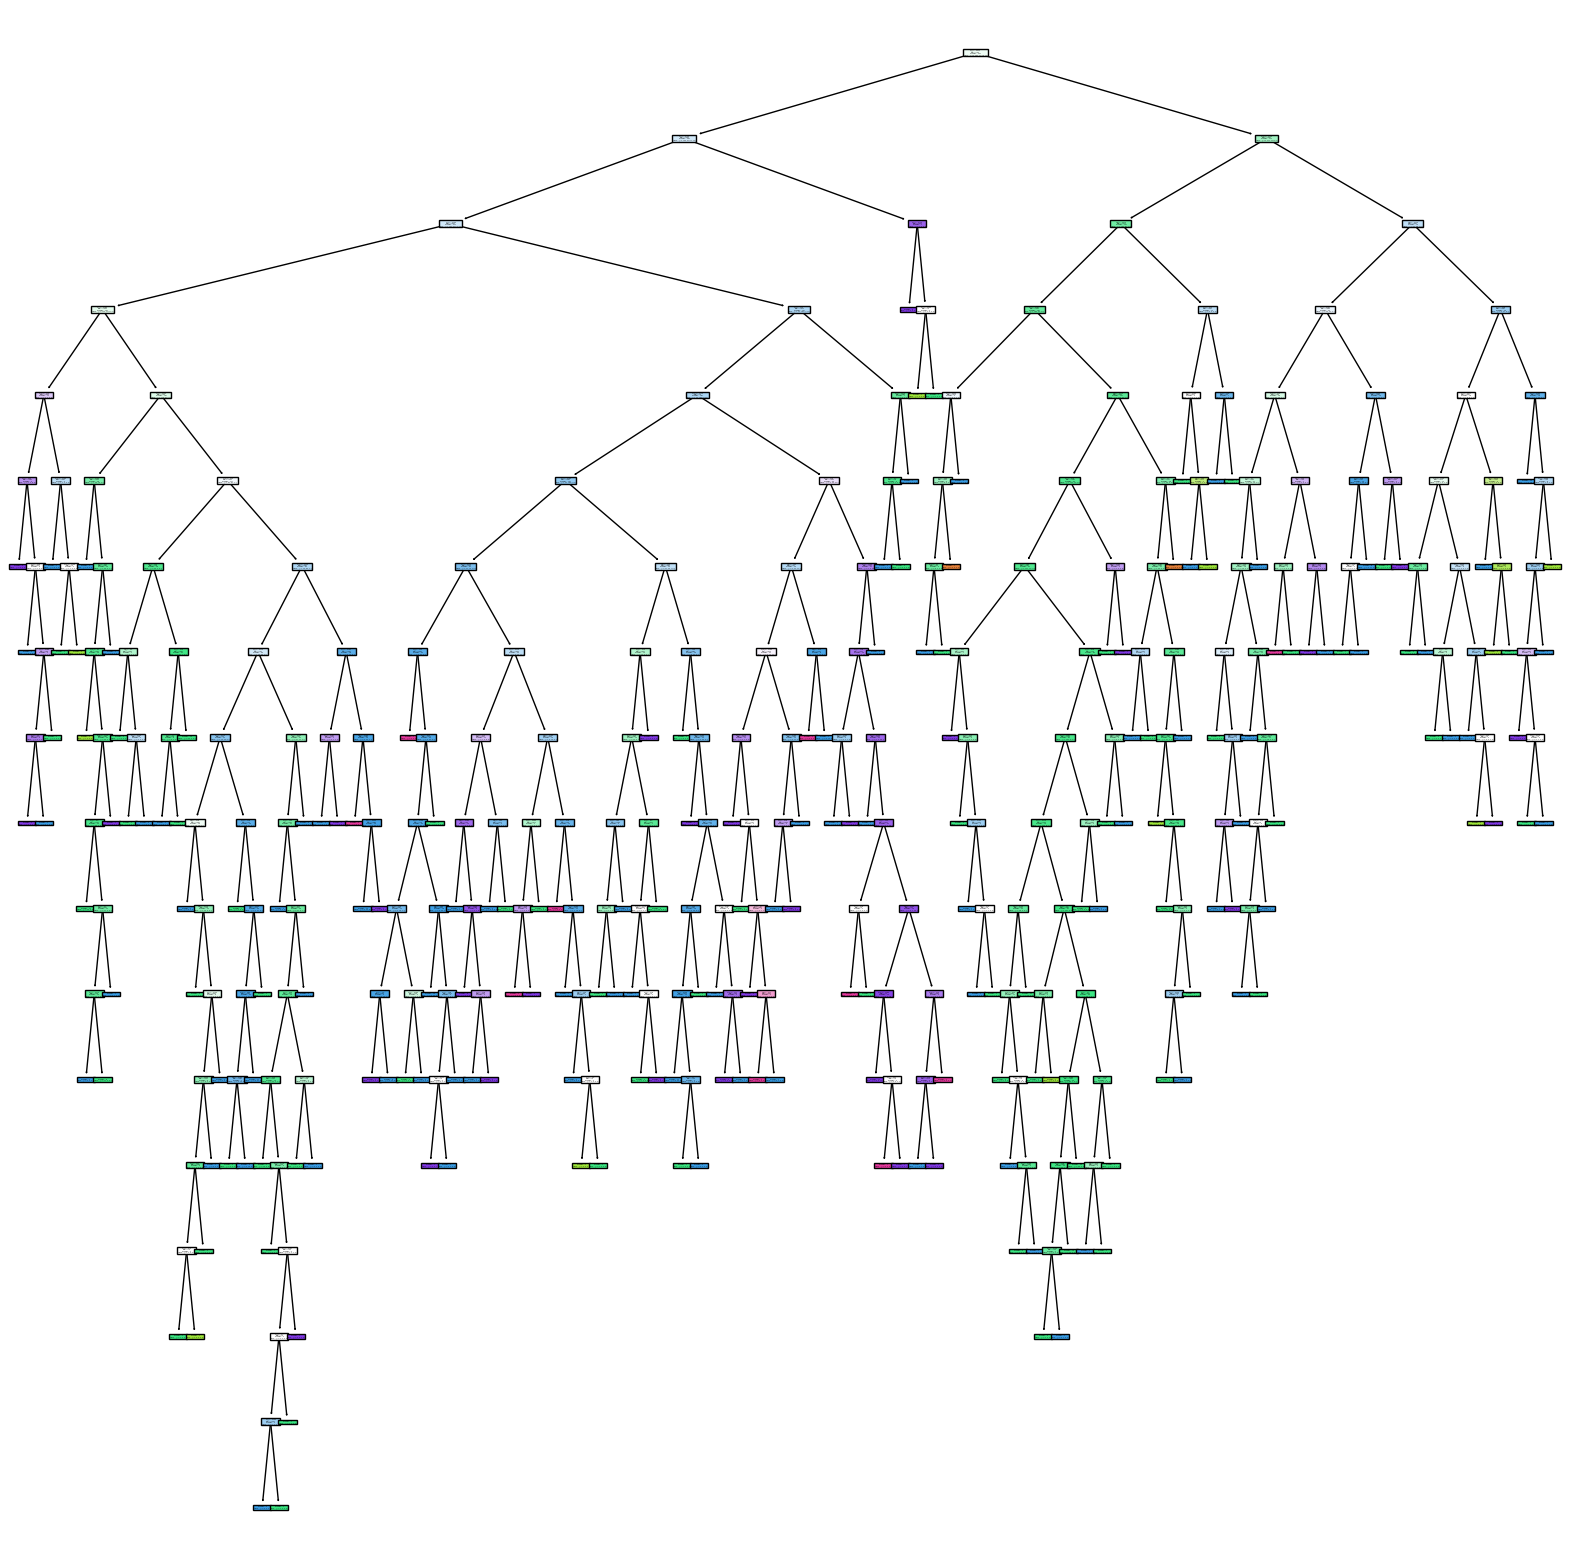

In [22]:
plt.figure(figsize= (20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

In [23]:
lst = [DecisionTreeClassifier(max_features='sqrt', random_state=1207221650),
 DecisionTreeClassifier(max_features='sqrt', random_state=271498305),
 DecisionTreeClassifier(max_features='sqrt', random_state=1520572380),
 DecisionTreeClassifier(max_features='sqrt', random_state=1084035594),
 DecisionTreeClassifier(max_features='sqrt', random_state=1600634660),
 DecisionTreeClassifier(max_features='sqrt', random_state=1771429680),
 DecisionTreeClassifier(max_features='sqrt', random_state=1616302164),
 DecisionTreeClassifier(max_features='sqrt', random_state=210688443),
 DecisionTreeClassifier(max_features='sqrt', random_state=211285308),
 DecisionTreeClassifier(max_features='sqrt', random_state=369716156),
 DecisionTreeClassifier(max_features='sqrt', random_state=1448064097),
 DecisionTreeClassifier(max_features='sqrt', random_state=1751221911),
 DecisionTreeClassifier(max_features='sqrt', random_state=2065746137),
 DecisionTreeClassifier(max_features='sqrt', random_state=1661677090),
 DecisionTreeClassifier(max_features='sqrt', random_state=1204059923),
 DecisionTreeClassifier(max_features='sqrt', random_state=243791502),
 DecisionTreeClassifier(max_features='sqrt', random_state=1524266902),
 DecisionTreeClassifier(max_features='sqrt', random_state=883654068),
 DecisionTreeClassifier(max_features='sqrt', random_state=576919577),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013041113),
 DecisionTreeClassifier(max_features='sqrt', random_state=1011446518),
 DecisionTreeClassifier(max_features='sqrt', random_state=2105498496),
 DecisionTreeClassifier(max_features='sqrt', random_state=1867116866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1765774877),
 DecisionTreeClassifier(max_features='sqrt', random_state=332723627),
 DecisionTreeClassifier(max_features='sqrt', random_state=2122328370),
 DecisionTreeClassifier(max_features='sqrt', random_state=497780875),
 DecisionTreeClassifier(max_features='sqrt', random_state=1055811522),
 DecisionTreeClassifier(max_features='sqrt', random_state=973649372),
 DecisionTreeClassifier(max_features='sqrt', random_state=1698401594),
 DecisionTreeClassifier(max_features='sqrt', random_state=370916769),
 DecisionTreeClassifier(max_features='sqrt', random_state=173983428),
 DecisionTreeClassifier(max_features='sqrt', random_state=1541050848),
 DecisionTreeClassifier(max_features='sqrt', random_state=1981734719),
 DecisionTreeClassifier(max_features='sqrt', random_state=1289180502),
 DecisionTreeClassifier(max_features='sqrt', random_state=1417764894),
 DecisionTreeClassifier(max_features='sqrt', random_state=1958054169),
 DecisionTreeClassifier(max_features='sqrt', random_state=266371829),
 DecisionTreeClassifier(max_features='sqrt', random_state=583880494),
 DecisionTreeClassifier(max_features='sqrt', random_state=694053796),
 DecisionTreeClassifier(max_features='sqrt', random_state=508394461),
 DecisionTreeClassifier(max_features='sqrt', random_state=1350988980),
 DecisionTreeClassifier(max_features='sqrt', random_state=2013731033),
 DecisionTreeClassifier(max_features='sqrt', random_state=978876927),
 DecisionTreeClassifier(max_features='sqrt', random_state=1620292421),
 DecisionTreeClassifier(max_features='sqrt', random_state=1595105460),
 DecisionTreeClassifier(max_features='sqrt', random_state=995615733),
 DecisionTreeClassifier(max_features='sqrt', random_state=833740744),
 DecisionTreeClassifier(max_features='sqrt', random_state=2132716536),
 DecisionTreeClassifier(max_features='sqrt', random_state=1696784032),
 DecisionTreeClassifier(max_features='sqrt', random_state=816488511),
 DecisionTreeClassifier(max_features='sqrt', random_state=238796200),
 DecisionTreeClassifier(max_features='sqrt', random_state=1945040390),
 DecisionTreeClassifier(max_features='sqrt', random_state=267920396),
 DecisionTreeClassifier(max_features='sqrt', random_state=1375254394),
 DecisionTreeClassifier(max_features='sqrt', random_state=338884359),
 DecisionTreeClassifier(max_features='sqrt', random_state=496445008),
 DecisionTreeClassifier(max_features='sqrt', random_state=17083671),
 DecisionTreeClassifier(max_features='sqrt', random_state=117854860),
 DecisionTreeClassifier(max_features='sqrt', random_state=1628821326),
 DecisionTreeClassifier(max_features='sqrt', random_state=1083921928),
 DecisionTreeClassifier(max_features='sqrt', random_state=819447854),
 DecisionTreeClassifier(max_features='sqrt', random_state=967831533),
 DecisionTreeClassifier(max_features='sqrt', random_state=1148838646),
 DecisionTreeClassifier(max_features='sqrt', random_state=248104915),
 DecisionTreeClassifier(max_features='sqrt', random_state=330080872),
 DecisionTreeClassifier(max_features='sqrt', random_state=2087654822),
 DecisionTreeClassifier(max_features='sqrt', random_state=1043560881),
 DecisionTreeClassifier(max_features='sqrt', random_state=1497404603),
 DecisionTreeClassifier(max_features='sqrt', random_state=1628300778),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416264479),
 DecisionTreeClassifier(max_features='sqrt', random_state=1651230503),
 DecisionTreeClassifier(max_features='sqrt', random_state=213211602),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491716064),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416735533),
 DecisionTreeClassifier(max_features='sqrt', random_state=352142613),
 DecisionTreeClassifier(max_features='sqrt', random_state=332246973),
 DecisionTreeClassifier(max_features='sqrt', random_state=2064188223),
 DecisionTreeClassifier(max_features='sqrt', random_state=1720959578),
 DecisionTreeClassifier(max_features='sqrt', random_state=938319536),
 DecisionTreeClassifier(max_features='sqrt', random_state=1216677341),
 DecisionTreeClassifier(max_features='sqrt', random_state=1020211174),
 DecisionTreeClassifier(max_features='sqrt', random_state=941561685),
 DecisionTreeClassifier(max_features='sqrt', random_state=1455116870),
 DecisionTreeClassifier(max_features='sqrt', random_state=48899324),
 DecisionTreeClassifier(max_features='sqrt', random_state=564214121),
 DecisionTreeClassifier(max_features='sqrt', random_state=978576042),
 DecisionTreeClassifier(max_features='sqrt', random_state=1496416686),
 DecisionTreeClassifier(max_features='sqrt', random_state=780965169),
 DecisionTreeClassifier(max_features='sqrt', random_state=134743595),
 DecisionTreeClassifier(max_features='sqrt', random_state=1828665050),
 DecisionTreeClassifier(max_features='sqrt', random_state=489082406),
 DecisionTreeClassifier(max_features='sqrt', random_state=639051190),
 DecisionTreeClassifier(max_features='sqrt', random_state=560204224),
 DecisionTreeClassifier(max_features='sqrt', random_state=121450284),
 DecisionTreeClassifier(max_features='sqrt', random_state=1990872082),
 DecisionTreeClassifier(max_features='sqrt', random_state=1921873150),
 DecisionTreeClassifier(max_features='sqrt', random_state=474293923),
 DecisionTreeClassifier(max_features='sqrt', random_state=1414423120),
 DecisionTreeClassifier(max_features='sqrt', random_state=912234182)]

In [24]:
print(len(lst))

100


Hyperparameter Tuning: GridSearchCV and RandomSearchCV

In [32]:
grid_param =  {
    "n_estimators" : [50 , 100 , 120],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(5)
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_serach_rf = GridSearchCV(param_grid= grid_param, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)
grid_serach_rf.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'n_estimators': [50, 100, 120]},
             verbose=1)

In [34]:
grid_serach_rf.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 120}

In [35]:
rf_new = RandomForestClassifier(n_estimators=120, criterion='entropy', max_depth=4)
rf_new.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=120)

In [36]:
rf_new.score(X_test, y_test)

0.6328671328671329

Task: Explore the implementation of RandomSearchCV on top of the random forest algorithm